# EDSA Apple Price Challenge
#### Team TS5 Regression

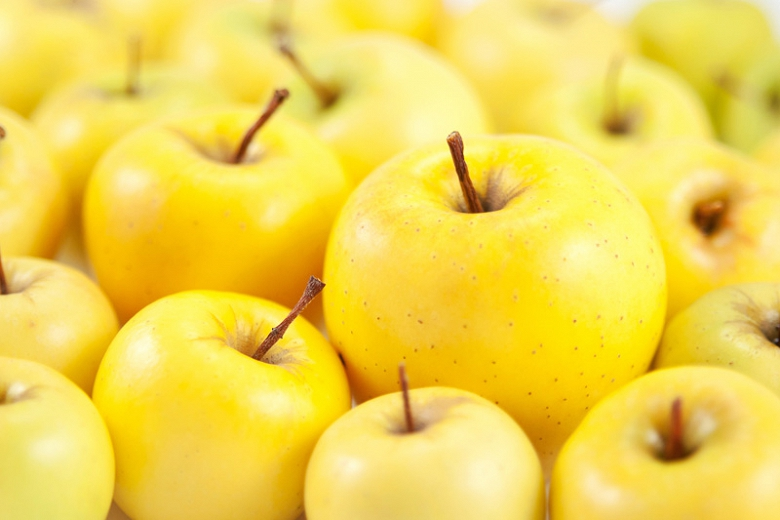

# Table of Content

1. <a href ="#1.-Challenge-description">Challenge description</a>
2. <a href ="#2.-Introduction">Introduction</a>
3. <a href ="#3.-Import-libraries-and-loading-data">Import libraries and loading data</a>
4. <a href ="#4.-Cleaning-data">Cleaning data</a>
5. <a href ="#5.-Univariate-Analysis">Univariate Analysis</a>
6. <a href ="#6.-Univariate-Analysis Graphical"> Univariate Analysis: Graphical</a>  

## 1. Challenge description

## Outline

## 2. Introduction

## EDA on the `EDSA Apple Price Challenge` dataset

# Basic Analysis


## 3. Import libraries and loading data

First, we'll import the libraries we will need.

In [112]:
# Regression models
from sklearn.linear_model import LinearRegression

# Model selection
from sklearn.model_selection import train_test_split

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Visualisations
#import missingno
import seaborn as sns
import matplotlib.pyplot as plt
#%matplotlib inline

# Other
from scipy import stats
import math
import pickle
import pandas as pd
import numpy as np

We will be loading our data as a Pandas Dataframe. For this challenge we will be using `EDSA Apple Price Challenge` dataset.

In [113]:
train = pd.read_csv(r"C:\Users\ADMIN\Desktop\datasets\df-train_set.csv")
test = pd.read_csv(r"C:\Users\ADMIN\Desktop\datasets\df-test_set.csv")
#test_commodities = test['Commodities']
test = test.drop('Commodities', axis=1)
train = train.loc[train['Commodities']=='APPLE GOLDEN DELICIOUS']
#train = train.drop('Commodities', axis=1) # Commodities will give NaN correlation with avg_price_per_kg

In [114]:
train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


We look at the top rows of our data in order to see the features as well as the types of data we are working with.



In [115]:
train.shape

(1952, 13)

The shape command shows us we have...

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 1 to 64310
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          1952 non-null   object 
 1   Container         1952 non-null   object 
 2   Size_Grade        1952 non-null   object 
 3   Weight_Kg         1952 non-null   float64
 4   Commodities       1952 non-null   object 
 5   Date              1952 non-null   object 
 6   Low_Price         1952 non-null   float64
 7   High_Price        1952 non-null   float64
 8   Sales_Total       1952 non-null   float64
 9   Total_Qty_Sold    1952 non-null   int64  
 10  Total_Kg_Sold     1952 non-null   float64
 11  Stock_On_Hand     1952 non-null   int64  
 12  avg_price_per_kg  1952 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 213.5+ KB


## 4. Cleaning data

The info command confirms our categorial and numerial features. This function tells us what columns are in the dataframe, how many null values they have and what datatype they are.

## 5. Univariate Analysis

This is where we will be looking at the descriptive statistics of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

     - df.describe()
     
This command will provide the mean, standard deviation and a five number summary of each numerical feature.

In [14]:
train.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
count,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000,1952.000000
mean,40.460912,174.307377,215.648053,20053.533811,174.510758,2960.176332,408.393955,6.778893
std,99.655169,373.553578,433.546159,39005.069445,308.810797,6097.416527,724.450582,2.248744
min,3.000000,2.000000,5.000000,5.000000,1.000000,3.000000,0.000000,0.250000
25%,9.000000,50.000000,60.000000,1325.000000,12.000000,219.600000,9.000000,5.460000
50%,12.000000,80.000000,108.000000,5495.000000,64.000000,853.500000,126.500000,6.670000
75%,18.300000,127.250000,160.000000,21082.500000,200.000000,3093.525000,468.000000,8.280000
max,400.000000,2300.000000,3300.000000,369464.000000,4237.000000,74000.000000,6400.000000,21.240000


Statistical measures such as **kurtosis** and **skew** can also be calculated.

Kurtosis is the measure of outliers present in the data. **High kurtosis (>3)** indicates a large number of outliers and **low kurtosis (<3)** a lack there of. 

Skew indicates how symmetric the data is. Below is a table that explains the range of values with regards to skew.

|   Skew Value (x)  |       Description of Data      |
|:-------------------|:---------------:|
| -0.5 < x < 0.5              |Fairly Symmetrical |
| -1 < x < -0.5 | Moderate Negative Skew  | 
| 0.5 < x < 1             | Moderate Positive Skew  | 
|       x < -1     |High Negative Skew  | 
|       x > 1  |High Positve Skew | 


In [21]:
train.kurtosis()

Weight_Kg            9.109698
Low_Price           17.073369
High_Price          13.630768
Sales_Total         24.200524
Total_Qty_Sold      32.338123
Total_Kg_Sold       45.153801
Stock_On_Hand       14.671224
avg_price_per_kg     1.042921
dtype: float64

Indicates a large amount of outliers in all features except `avg_price_per_kg`

In [22]:
train.skew()

Weight_Kg           3.328254
Low_Price           4.222672
High_Price          3.828819
Sales_Total         4.250317
Total_Qty_Sold      4.445169
Total_Kg_Sold       5.529586
Stock_On_Hand       3.391815
avg_price_per_kg    0.082452
dtype: float64

The feature `avg_price_per_kg` is moderately skewed in a positive direction, while the rest of the features are highly skewed to the right.

# Univariate Analysis: Graphical

We can look at the distribution of any numerical feature by using the following plots:

- histogram
- density plot
- box plot
- violin plot


For a categorical feature we will use a:

- bar plot

#### Histogram and Density Plot

For displaying a histogram and density plot we will be using the Matplotlib library and create a list of all numerical features to visualise these features at the same time.

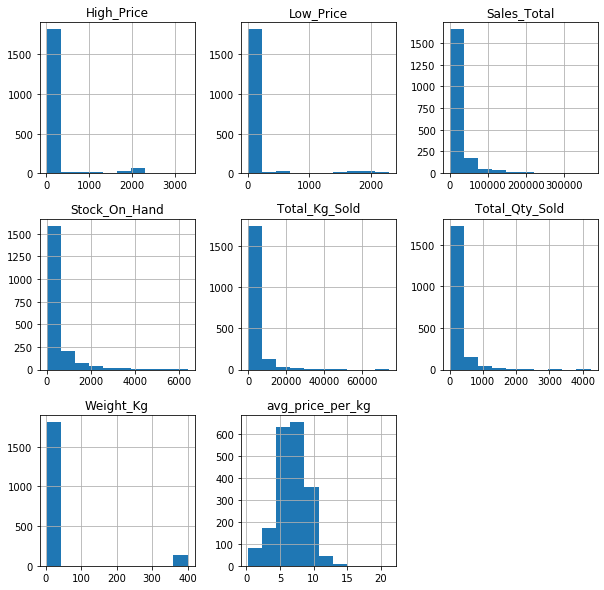

In [4]:
# create histogram
features = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand','avg_price_per_kg']
train[features].hist(figsize=(10,10));

In [ ]:
# create density plot

#### Box Plot and Violin Plot

For the Box Plot and Violin Plot, we will use the seaborn library and only select one feature instead of all the numerical features. We can visualise all numerical features simultaneously, but as the range of values for each feature is different, it will not create a useful visualisation.

### Bar Plot

For the categorical features, we can create a **bar plot** to display the frequency distribution. 


### Multivariate Analysis: Non-Graphical 

For this analysis, we can determine the relationship between any two numerical features by calculating the correlation coefficient. Correlation is a measure of the degree to which two variables change together, if at all. If two features have a strong positive correlation, it means that if the value of one feature increases, the value of the other feature also increases.

We will focus on the Pearson correlation. The Pearson correlation measures the linear relationship between features and assumes that the features are normally distributed. Below is a table that explains how to interpret the Pearson correlation measure:


|   Pearson Correlation Coefficient (r)  |       Description of Relationship     |
|:-------------------|:---------------:|
|  r = -1              |Perfect Negative Correlation |
| -1 < r < -0.8 | Strong Negative Correlation  | 
| - 0.8 < r < -0.5             | Moderate Negative Correlation  | 
|       - 0.5 < r < 0     |Weak Negative Correlation  | 
|       r = 0  |No Linear Correlation | 
| 0 < r < 0.5 | Weak Positive Correlation  | 
| 0.5 < r < 0.8             | Moderate Positive Correlation  | 
|       0.8 < r < 1     |Strong Positive Correlation  | 
|       r = 1  |Perfect Positive Correlation | 


In [ ]:
df.corr()

### Multivariate Analysis: Graphical

#### Heatmap

The relationship between features can also be displayed graphically using a **heatmap**. The Seaborn library will be used for this basic heatmap visualisation. 

The correlation coefficient value will be displayed on the heatmap using the `vmin` and `vmax` parameters.

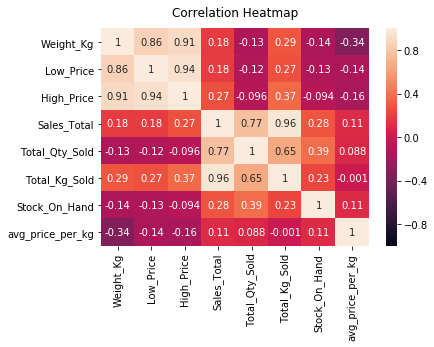

In [9]:
heatmap = sns.heatmap(train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

## Feature Selection

The process of choosing the most relevant features in your data. "Most relevant" can depend on many factors, but it might be something as simple as the highest correlation with the target, or the features with the most variance. In feature selection, we remove features that do not help our model learn the relationship between features and the target. This can help the model generalize better to new data and results in a more interpretable model.

Before we decide which features to use in our model, we should take a look at the distribution of our target variable.

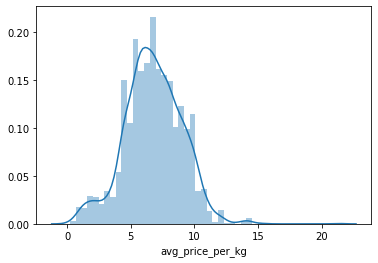

In [39]:
# target distribution
sns.distplot(train['avg_price_per_kg'],kde=True)

The data is normally distributed but slightly skewed to the right.

### Dummy Variable Encoding

All input data for regression model building purposes needs to be numerical. We therefore have to transform the text data (found within columns such as 'Province','Container', 'Size_Grade', 'Commodities' and 'Date') into numbers before we can train our machine learning model.

To facilitate this transformation from textual-categorical data to numerical equivalents, we use a pandas method called get_dummies. The text data are categorical variables, and ***get_dummies*** will transform all the categorical text data into numbers by adding a column for each distinct category. The new column has a 1 for observations which were in this category, and a 0 for observations that were not.

In [40]:
dummy_df = pd.get_dummies(train)
dummy_df.head()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,Province_CAPE,Province_EASTERN CAPE,...,Date_2020-09-07,Date_2020-09-09,Date_2020-09-16,Date_2020-09-17,Date_2020-09-19,Date_2020-09-21,Date_2020-09-23,Date_2020-09-28,Date_2020-10-01,Date_2020-10-03
1,18.3,150.0,170.0,51710.0,332,6075.6,822,8.51,1,0,...,0,1,0,0,0,0,0,0,0,0
7,11.0,50.0,50.0,16000.0,320,3520.0,0,4.55,1,0,...,0,0,0,0,0,0,0,0,0,0
24,9.0,55.0,55.0,990.0,18,162.0,1506,6.11,0,0,...,0,0,0,0,0,0,0,0,0,0
40,18.3,80.0,120.0,32020.0,388,7100.4,443,4.51,1,0,...,0,0,0,0,0,0,0,0,0,0
69,400.0,1800.0,1800.0,1800.0,1,400.0,2,4.50,0,1,...,0,0,0,0,0,0,0,1,0,0


Now we get to where we can decide which features to use to buld our model. There are various methods we could use for feature selection (one example is selecting features based on p-values) but the one we will use is the Pearson Correlation Coefficient

### Correlation and Variable Selection

Using the dummy variable dataframe, we can build a model that predicts `avg_price_per_kg` (our dependent variable) as a function of 182 different independent variables (IVs)

Before we do this, however, let's reorder columns so that our dependent variable is the last column of the dataframe. This will make a heatmap visualisation representing a correlation matrix of our data easier to interpret.

In [41]:
column_titles = [col for col in dummy_df.columns if col!= 'avg_price_per_kg'] + ['avg_price_per_kg']
dummy_df = dummy_df.reindex(columns=column_titles)

In [42]:
# Target correlations with features
corrs = pd.DataFrame(dummy_df.corr()['avg_price_per_kg']).rename(columns = {'avg_price_per_kg':'Correlation'})
corrs.sort_values(by='Correlation',ascending=False, inplace=True)
corrs

,Correlation
avg_price_per_kg,1.000000
Container_M4183,0.403229
Size_Grade_1L,0.280966
Province_W.CAPE-BERGRIVER ETC,0.262051
Size_Grade_1X,0.251451
Container_EC120,0.188162
Size_Grade_1M,0.175779
Container_EF120,0.114297
Sales_Total,0.108473
Stock_On_Hand,0.105028


However, we also need to look for predictor variable pairs which have a high correlation with each other to avoid autocorrelation. Instead of looking at the whole correlation matrix, it might be easier to isolate the sections of the correlation matrix to where the off-diagonal correlations are high:

In [43]:
# As before, we create the correlation matrix
# and find rows and columns where correlation coefficients > 0.9 or <-0.9
#corr = X_data.corr()
r, c = np.where(np.abs(corrs) > 0.9)

# We are only interested in the off diagonal entries:
off_diagonal = np.where(r != c)

# Show the correlation matrix rows and columns where we have highly correlated off diagonal entries:
corrs.iloc[r[off_diagonal], c[off_diagonal]]

""


It seems we do not have any autocorrelate features. We will now build a few models using our features to see which perform best. The models we will build will be trained on
 - the feature with the highest correlation with our target - Container_M4183
 - all the features in our dummy_df

## Training

### Preprocessing

Let's try and find out what percentage of the data in each collumn the missing values account for with the function we've created below.

In [20]:
# missing values
def missing_values_table(df):
        mis_val = df.isnull().sum()
        
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [21]:
missing_values_table(dummy_df)

Your selected dataframe has 183 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### Making Predictions

In [44]:
# Function to fit data, make predictions, and evaluate model
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(y_pred,y_test))

def r_squared(y_test, y_pred):
    return r2_score(y_test, y_pred)
    
# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model,X,y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = rmse(y_train, train_pred)
    test_rmse = rmse(y_test, test_pred)
    
    train_r2 = r_squared(y_train, train_pred)
    test_r2 = r_squared(y_test, test_pred)
    
    df = {'Train RMSE': train_rmse,'Train R^2':train_r2,'Test RMSE': test_rmse,'Test R^2':test_r2}
    
    return df

In [45]:
# Our model will be the same throughout, so will our y
model = LinearRegression(n_jobs=-1)
y = dummy_df['avg_price_per_kg']
y.shape

(1952,)

In [46]:
# fit the model to the data and make predictions - Container_M4183
X = dummy_df['Container_M4183'].values.reshape(-1, 1)
fit_and_evaluate(model,X,y)

{'Train RMSE': 2.065617561699141,
 'Train R^2': 0.17226587611781274,
 'Test RMSE': 2.026090611603195,
 'Test R^2': 0.11531344644437602}

In [47]:
# fit the model to the data and make predictions - all features
X = dummy_df.drop('avg_price_per_kg',axis=1).values
y = dummy_df['avg_price_per_kg']

fit_and_evaluate(model,X,y)

{'Train RMSE': 1.2139989096502701,
 'Train R^2': 0.7140911369818779,
 'Test RMSE': 1.4105711751632135,
 'Test R^2': 0.5711931564754813}

**Metrics used**
  - Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in climatology, forecasting, and regression analysis to verify experimental results.
  - R-squared is a statistical measure of how close the data are to the fitted regression line. It is also  known as the coefficient of determination, or the coefficient of multiple determination for multiple regression; it is the percentage of the response variable variation that is explained by a linear model.

## Checking for Linearity

The first thing we need to check is the mathematical relationship between each predictor variable and the response variable. What we are looking for here is known as linearity. A linear relationship means that a change in the response *Y* due to a one-unit change in the predictor $X_j$ is constant, regardless of the value of $X_j$.

If we fit a regression model to a dataset that is non-linear, it will fail to adequately capture the relationship in the data - resulting in a mathematically inappropriate model. In order to check for linearity, we can produce scatter plots of each individual predictor against the response variable. The intuition here is that we are looking for obvious linear relationships.

## Checking for Multicollinearity

Multicollinearity refers to the presence of strong correlation among two or more of the predictor variables in the dataset. The presence of any correlation among predictors is detrimental to model quality for two reasons:

- It tends to increase the standard error;

- It becomes difficult to estimate the effect of any one predictor variable on the response variable.

We will check for multicollinearity by generating pairwise scatter plots among predictors.

## Modelling Price

In [ ]:
# create figure and 3D axis


# set axis lables


# scatter plot with response variable and 2 predictors

## Fitting a Multivariate Regression Model

In [ ]:
# import regression module

In [50]:
# split predictors and response
X_val = dummy_df.drop('avg_price_per_kg',axis=1)
y_val = dummy_df['avg_price_per_kg']

In [49]:
# create model object
lm = LinearRegression()

In [51]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_val, 
                                                    y_val, 
                                                    test_size=0.20, 
                                                    random_state=1)

In [52]:
# train model
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing Model on unseen data

## Assessing Model accuracy

In [57]:
# dictionary of results
results_dict = {'Training MSE':
                    {
                        "MSE": mean_squared_error(y_train, lm.predict(X_train)), 'R2': r2_score(y_train, lm.predict(X_train))
                    },
                'Test MSE':
                    {
                        "MSE": mean_squared_error(y_test, lm.predict(X_test)), 'R2': r2_score(y_test, lm.predict(X_test))
                    },
                'Test RMSE':
                    {
                        "MSE": math.sqrt(mean_squared_error(y_test, lm.predict(X_test)))
                    }
                }

In [58]:
# create dataframe from dictionary
results_df = pd.DataFrame(data=results_dict)

In [59]:
results_df

,Training MSE,Test MSE,Test RMSE
MSE,1.546734,1.705757,1.306047
R2,0.702619,0.617726,NaN


## Conclusion